# Neural Nets

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] = 'green'

In [13]:
train = pd.read_csv('../Base de Datos/trainset-sin-id.csv')
test = pd.read_csv('../Base de Datos/testset-sin-id.csv')
train = train.drop(['t_mode', 'id'], axis = 1)
test = test.drop(['t_mode', 'id'], axis = 1)

In [14]:
train.head()

,t_key,t_dur,t_dance,t_energy,t_speech,t_acous,t_ins,t_live,t_val,t_tempo,popularity,ClasePopularidad
0,2.217079,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
1,4.304625,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
2,4.304625,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
3,3.828397,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
4,3.828397,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3


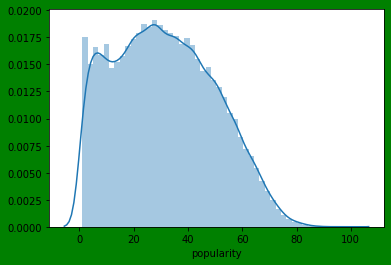

In [15]:
fig = plt.figure()
sns.distplot(train['popularity'])

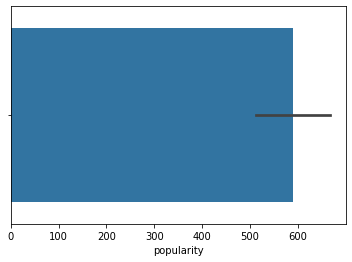

In [77]:
sns.barplot(train['popularity'].value_counts())

In [11]:
test.head()

,t_key,t_dur,t_dance,t_energy,t_speech,t_acous,t_ins,t_live,t_val,t_tempo,popularity,ClasePopularidad
0,3.873489,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
1,1.595405,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
2,4.359420,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
3,3.873489,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
4,4.359420,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2


In [12]:
print(train.shape, test.shape)

(55543, 12) (13920, 12)


Generate X_train, X_test, y_train, y_test

In [23]:
X_train = train.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_train = train['popularity']
X_test = test.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_test = test['popularity']


Generate X_train_scaled, X_test_scaled.
To do that we will import Standard Scaler from sklearn.preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler
# Instantiate the Object
scaler = StandardScaler()
# Fit the object to the train dataset
scaler.fit(X_train)
# Transform the train and test dataset (note we do not fit to the test in order to prevent leakage)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Initialize the Neural Net
We are going to use a Multi-Layer-Perceptron here, to check out how it performs. I suspect it will probably do better than earlier methods

In [14]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

Initialize a neural net object that has 2 16 neuron hidden layers

In [78]:
neural_net = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 10, 12), solver = 'adam', random_state = 42, tol = 0.00005, verbose = True)


In [79]:
neural_net.fit(X_train_scaled, y_train)

Iteration 1, loss = 378.92090363
Iteration 2, loss = 175.90020226
Iteration 3, loss = 169.87897735
Iteration 4, loss = 166.50022952
Iteration 5, loss = 164.26990280
Iteration 6, loss = 162.78667125
Iteration 7, loss = 161.66356736
Iteration 8, loss = 160.87971972
Iteration 9, loss = 160.22454237
Iteration 10, loss = 159.57998865
Iteration 11, loss = 159.02917659
Iteration 12, loss = 158.50570212
Iteration 13, loss = 158.08204382
Iteration 14, loss = 157.75984483
Iteration 15, loss = 157.46822202
Iteration 16, loss = 157.23410712
Iteration 17, loss = 156.97806112
Iteration 18, loss = 156.81935977
Iteration 19, loss = 156.59393452
Iteration 20, loss = 156.49845222
Iteration 21, loss = 156.34852669
Iteration 22, loss = 156.20000751
Iteration 23, loss = 156.05105236
Iteration 24, loss = 155.92569707
Iteration 25, loss = 155.85669822
Iteration 26, loss = 155.72550442
Iteration 27, loss = 155.69417096
Iteration 28, loss = 155.63836937
Iteration 29, loss = 155.54566292
Iteration 30, loss = 15

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 10, 12), learning_rate='constant',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=5e-05,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [72]:
y_pred = neural_net.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
diff

,y_pred,y_test
0,31.939386,56.0
1,20.109020,22.0
2,34.241862,22.0
3,33.648923,50.0
4,34.922949,35.0
...,...,...
13915,29.576143,38.0
13916,25.369130,13.0
13917,29.494491,37.0
13918,27.739570,28.0


Analyze how well did the model do

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')

El mse es : 314.7323974874895 y el r2 es : 0.08160040176687289
